**Author: Muhammed Umar Khan**
---
**Date: April 11th, 2025**
---
**Desc: ML Data Analysis for Social Media vs Human Emotion, Dataset through Kaggle**

In [1]:
#Import Statments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading Data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1001, 10)
Test shape: (103, 10)


In [3]:
# Clean column names
train.columns = train.columns.str.strip().str.replace(" ", "_")
test.columns = test.columns.str.strip().str.replace(" ", "_")

numeric_features = ["Daily_Usage_Time", "Posts_Per_Day", "Likes_Received_Per_Day",  # Define expected numeric features
                    "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]

# Filter ONLY existing columns in train/test
existing_train_numeric = [col for col in numeric_features if col in train.columns]
existing_test_numeric = [col for col in numeric_features if col in test.columns]

train[existing_train_numeric] = train[existing_train_numeric].fillna(train[existing_train_numeric].mean()) # Handling missing values using train mean

for col in existing_test_numeric:
    if col in train.columns:
        test[col] = test[col].fillna(train[col].mean())

# Encoding the target variable (Dominant_Emotion) in train set
if "Dominant_Emotion" in train.columns:
    label_encoder = LabelEncoder()
    train["Dominant_Emotion"] = label_encoder.fit_transform(train["Dominant_Emotion"])
    
    if "Dominant_Emotion" in test.columns:
        test["Dominant_Emotion"] = label_encoder.transform(test["Dominant_Emotion"])

    print("\nEncoded Target Variable Mapping:")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
else:
    print("Dominant_Emotion column not found in train dataset.")

# Final dataset overviews
print("\nMissing Values in Train:\n", train.isnull().sum())
print("\nMissing Values in Test:\n", test.isnull().sum())
print("\nProcessed Train Overview:")
print(train.head())
print(train.info())



Encoded Target Variable Mapping:
{'Anger': 0, 'Anxiety': 1, 'Boredom': 2, 'Happiness': 3, 'Neutral': 4, 'Sadness': 5, nan: 6}

Missing Values in Train:
 User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time_(minutes)    1
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Missing Values in Test:
 User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time_(minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Processed Train Overview:
  User_ID Age      Gender   Platform  Daily_Usage_Time_(minutes)  \
0       1  25      Female  Instagram                       

**Analysis**

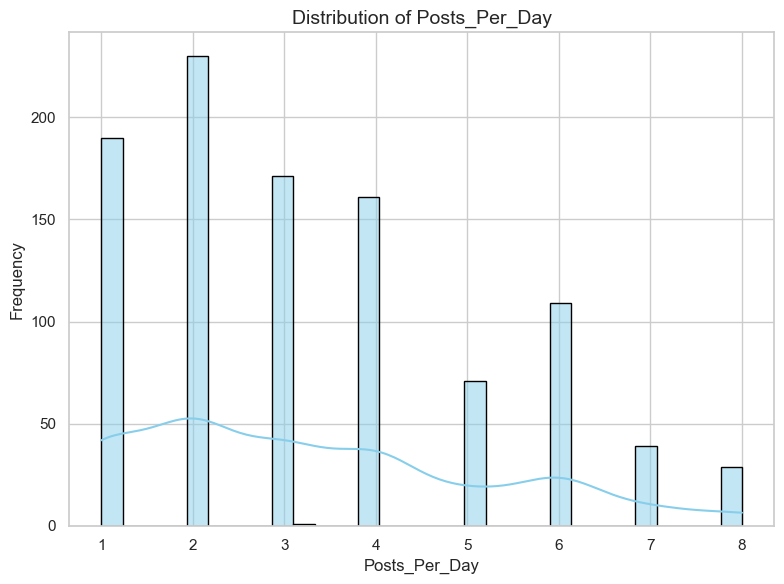

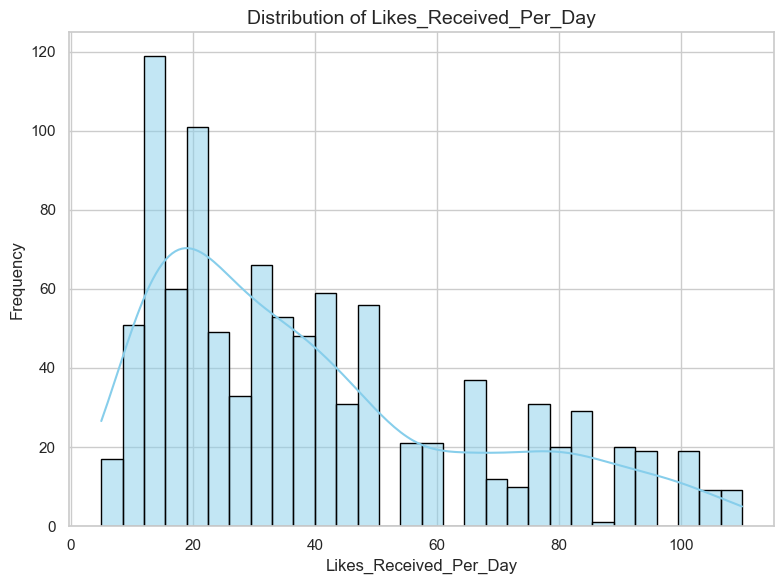

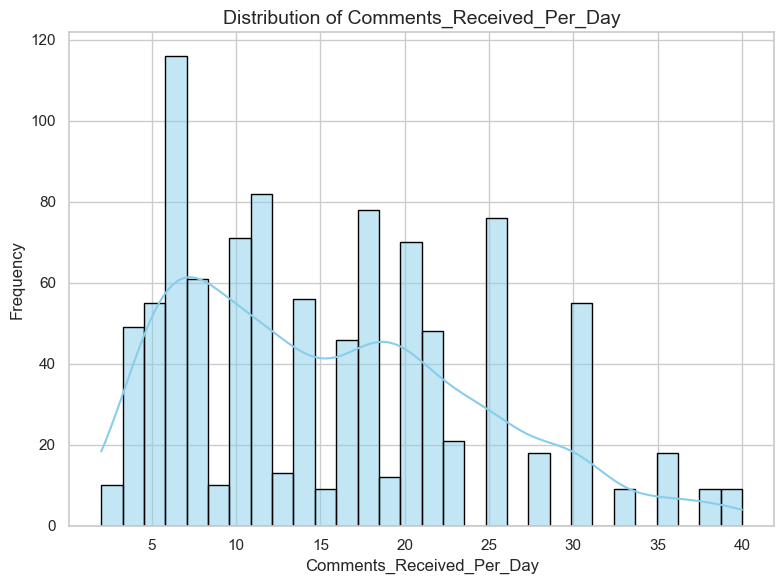

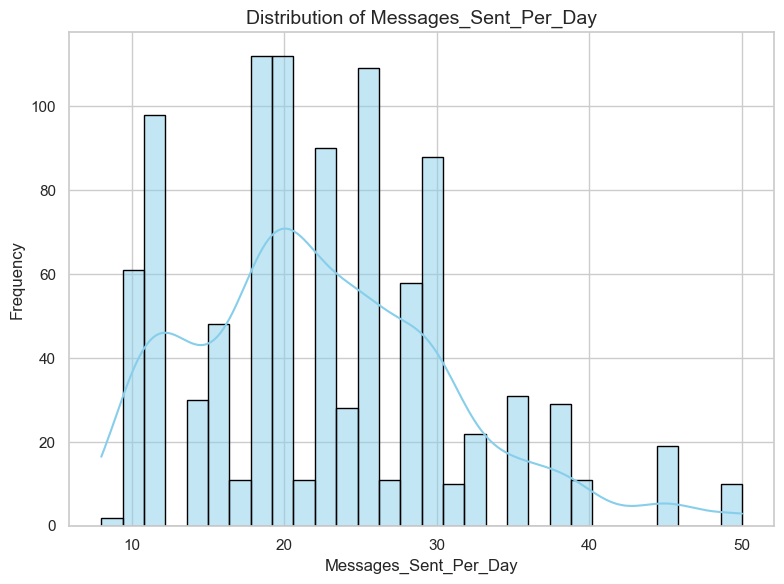

In [4]:
# Plotting basic statistics in the data
sns.set(style="whitegrid")

# Reuse or redefine the list of numeric features that exist in the train set
numeric_features = ["Daily_Usage_Time", "Posts_Per_Day", "Likes_Received_Per_Day", 
                    "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]
existing_numeric_features = [col for col in numeric_features if col in train.columns]

# Visualize the distribution of numeric features in the train set
for feature in existing_numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[feature], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


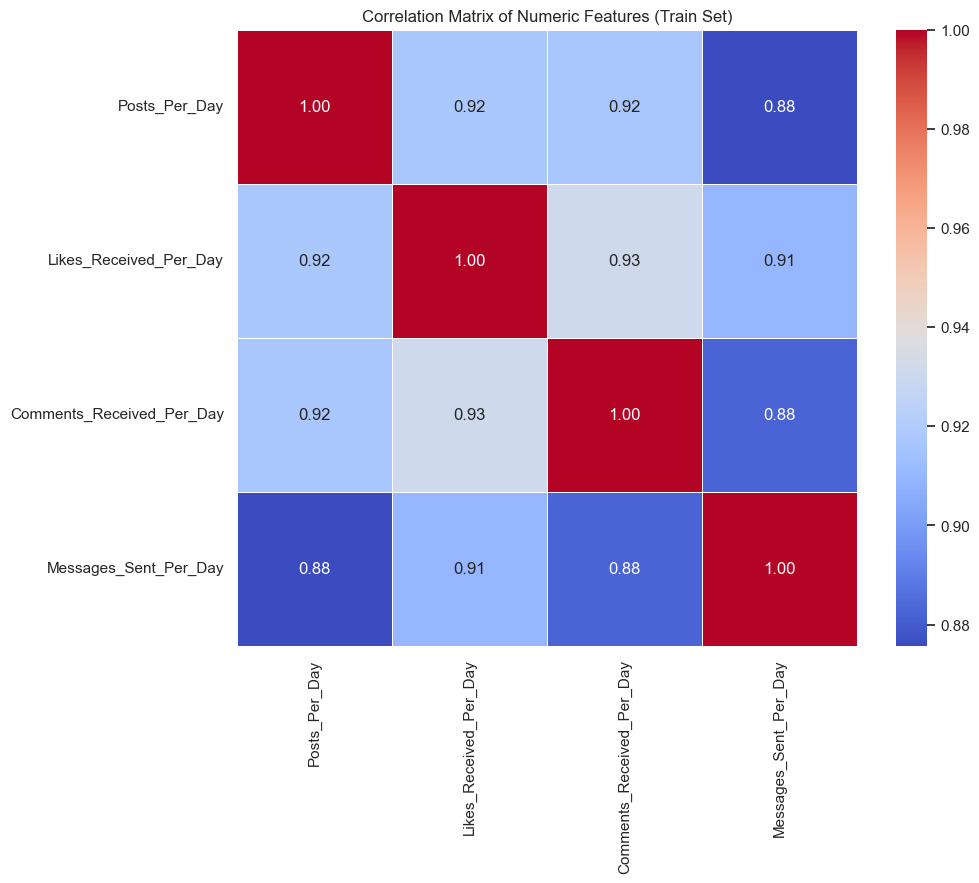

In [5]:
#heatmap of numeric features in the training set
correlation_matrix = train[existing_numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features (Train Set)')
plt.show()


**Data Prep**

In [6]:
# Define features and labels directly from train/test DataFrames
X_train = train[existing_numeric_features]
y_train = train["Dominant_Emotion"]

X_test = test[existing_numeric_features]
y_test = test["Dominant_Emotion"] if "Dominant_Emotion" in test.columns else None

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 1001
Testing set size: 103


**Models**

In [7]:

#Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\n🔹 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


🔹 Logistic Regression Evaluation:
Accuracy: 0.4368932038834951
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.33      0.27         9
           1       0.58      0.50      0.54        22
           2       0.50      0.62      0.56        16
           3       0.69      0.79      0.73        14
           4       0.29      0.32      0.31        28
           5       0.25      0.07      0.11        14

    accuracy                           0.44       103
   macro avg       0.42      0.44      0.42       103
weighted avg       0.43      0.44      0.42       103



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Classifier Evaluation:
Accuracy: 0.9320388349514563
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.95      0.98        22
           2       0.88      0.94      0.91        16
           3       0.93      1.00      0.97        14
           4       0.93      0.96      0.95        28
           5       0.91      0.71      0.80        14

    accuracy                           0.93       103
   macro avg       0.93      0.93      0.92       103
weighted avg       0.93      0.93      0.93       103



In [9]:
#SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSupport Vector Machine (SVM) Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Evaluation:
Accuracy: 0.46601941747572817
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.56      0.34         9
           1       0.86      0.27      0.41        22
           2       0.48      0.88      0.62        16
           3       0.79      0.79      0.79        14
           4       0.36      0.43      0.39        28
           5       0.00      0.00      0.00        14

    accuracy                           0.47       103
   macro avg       0.46      0.49      0.43       103
weighted avg       0.49      0.47      0.43       103



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Comparison

In [10]:
#classification reports
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Build a dictionary with results
model_results = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Support Vector Machine (SVM)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        logreg_report["weighted avg"]["precision"],
        rf_report["weighted avg"]["precision"],
        svm_report["weighted avg"]["precision"]
    ],
    "Recall": [
        logreg_report["weighted avg"]["recall"],
        rf_report["weighted avg"]["recall"],
        svm_report["weighted avg"]["recall"]
    ],
    "F1-Score": [
        logreg_report["weighted avg"]["f1-score"],
        rf_report["weighted avg"]["f1-score"],
        svm_report["weighted avg"]["f1-score"]
    ]
}

# Convert to DataFrame
model_comparison_df = pd.DataFrame(model_results)

# Format to 4 decimal places for better readability
model_comparison_df[["Accuracy", "Precision", "Recall", "F1-Score"]] = model_comparison_df[["Accuracy", "Precision", "Recall", "F1-Score"]].round(4)

# Display the comparison table
print("\n Model Comparison Summary:")
print(model_comparison_df)


 Model Comparison Summary:
                          Model  Accuracy  Precision  Recall  F1-Score
0           Logistic Regression    0.4369     0.4278  0.4369    0.4225
1                 Random Forest    0.9320     0.9328  0.9320    0.9301
2  Support Vector Machine (SVM)    0.4660     0.4856  0.4660    0.4289


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


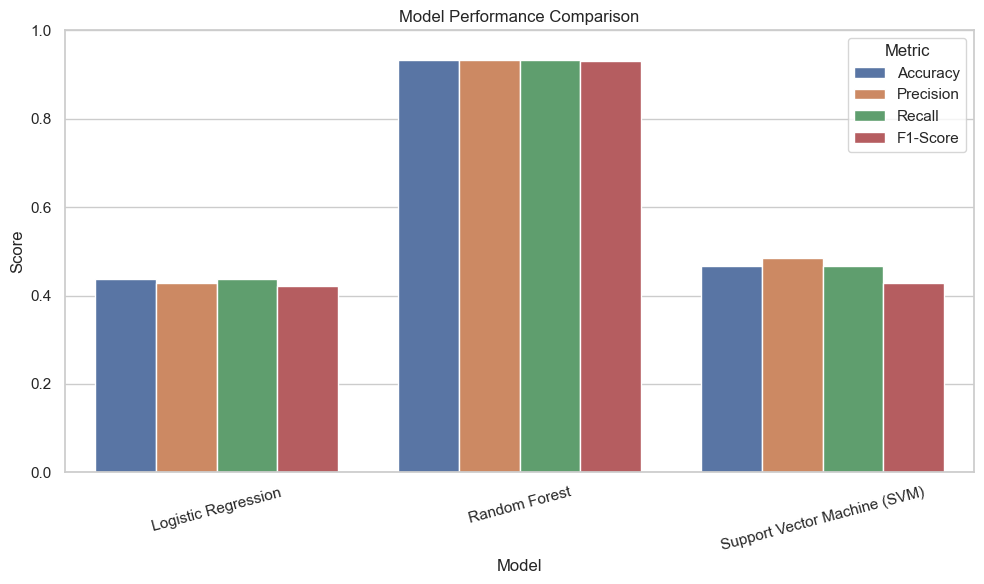

In [11]:
# Plotting the model comparison
sns.set(style="whitegrid")

# Melt the DataFrame to long format for seaborn
df_melted = model_comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")

# Add titles and labels
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # Since all metrics are between 0 and 1
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


/var/folders/12/jzfmr6ws501_wp4_ngzx2lrw0000gn/T/ipykernel_75847/297855292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Dominant_Emotion", y="Daily_Usage_Time_(minutes)", palette="Set2")


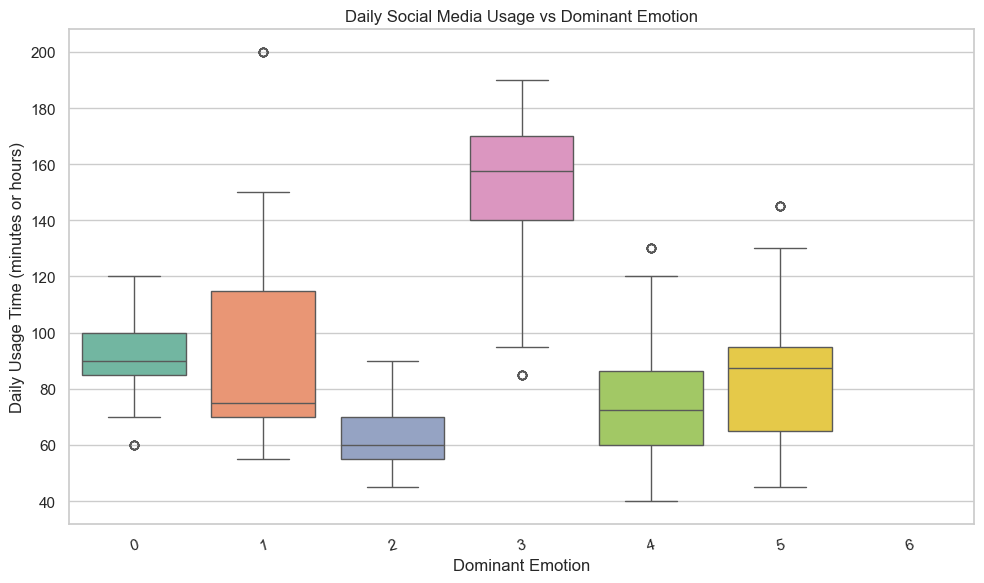

In [12]:
# Plot Social Media usage vs Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x="Dominant_Emotion", y="Daily_Usage_Time_(minutes)", palette="Set2")

# Title and labels
plt.title("Daily Social Media Usage vs Dominant Emotion")
plt.xlabel("Dominant Emotion")
plt.ylabel("Daily Usage Time (minutes or hours)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


/var/folders/12/jzfmr6ws501_wp4_ngzx2lrw0000gn/T/ipykernel_75847/890759344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Dominant_Emotion", y="Likes_Received_Per_Day", palette="Set2")


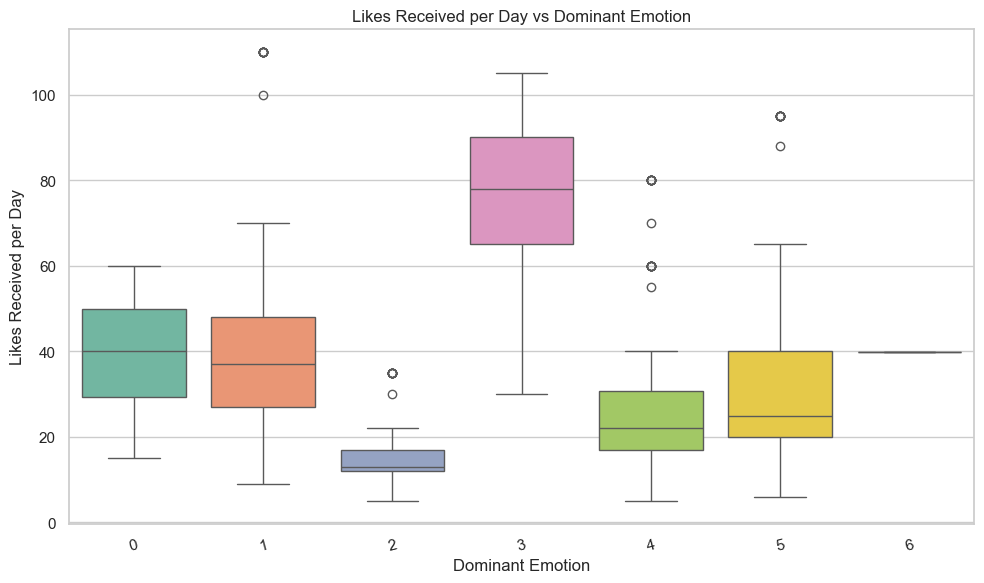

In [13]:
#Plot likes recived vs emotion
sns.set(style="whitegrid")

#Likes_Received_Per_Day vs Dominant_Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x="Dominant_Emotion", y="Likes_Received_Per_Day", palette="Set2")

# Title and labels
plt.title("Likes Received per Day vs Dominant Emotion")
plt.xlabel("Dominant Emotion")
plt.ylabel("Likes Received per Day")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [14]:
# Decode the numeric labels back to their emotion labels
emotion_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("\nEmotion Mapping (Numeric to Label):")
print(emotion_mapping)



Emotion Mapping (Numeric to Label):
{0: 'Anger', 1: 'Anxiety', 2: 'Boredom', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: nan}
